In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [23]:
## Read the CSV File Using Pandas read_csv function
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [24]:
# 機械学習するクラスを指定（クラス分類の場合）
df['label'] = iris.target
#df.loc[df['label'] == 0, 'label'] = "setosa"
#df.loc[df['label'] == 1, 'label'] = "versicolor"
#df.loc[df['label'] == 2, 'label'] = "virginica"
print(df.shape)
df.head(5)

(150, 5)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

# 生データの確認

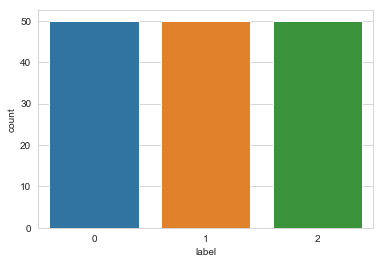

In [25]:
# 歩行データ Group ごとに表示（単純歩行のみで）
sns.set_style("whitegrid")
sns.countplot(x='label', data=df)

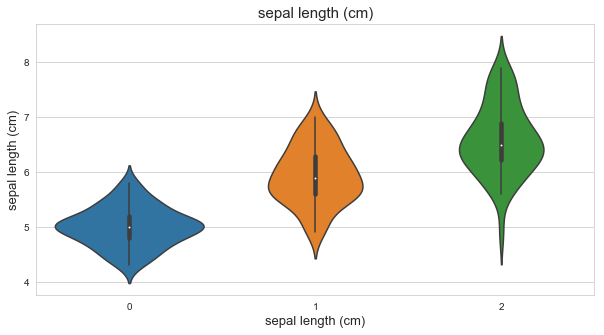

In [26]:
plt.figure(figsize=(10,5))
sns.violinplot(x='label', y='sepal length (cm)', data=df)
plt.title('sepal length (cm)',fontsize=15)
plt.xlabel('sepal length (cm)',fontsize=13)
plt.ylabel('sepal length (cm)',fontsize=13)
plt.show()

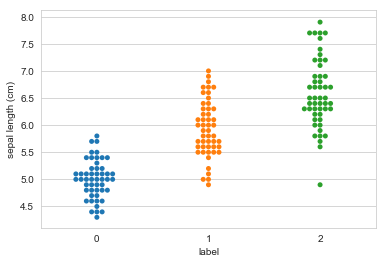

In [27]:
sns.swarmplot(y='sepal length (cm)', data=df, x='label') 
#plt.savefig('temp.jpeg') 
plt.show()

In [28]:
feature_col_names =["sepal length (cm)","sepal width (cm)", "petal length (cm)","petal width (cm)"]
predicted_class_names = 'label'

# 分類タスク
## 学習・テストに分割してから、一歩一歩のデータを学習・テストにセットする

In [29]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.datasets import make_blobs
from dtreeviz.trees import dtreeviz
from sklearn import tree

### RandomForestClassifier 

In [30]:
from dtreeviz.trees import dtreeviz
def exec_rfc(X_test, y_test, X_train, y_train, feature_col_names):

    clf=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=100,random_state=7)
    
    clf.fit(X_train, y_train.ravel())
    #viz = dtreeviz(clf,X_train,y_train,target_name='Group',feature_names=feature_col_names,class_names=[0,1]) 
    #viz.view()
    if VERBOSE==True:

        report_performance(clf, X_test, y_test) 
        roc_curves(clf, X_test, y_test)
        accuracy(clf, X_test, y_test)
       
    # Feature Importance 
    feat_importances = pd.Series(clf.feature_importances_, index=feature_col_names)

    if FEATUREINFO==True:

        feat_importances.nlargest(8).plot(kind='barh')
        plt.title("Feature Importance:")
        plt.show()
    
        # モデルの木構造の視覚化
        from sklearn import tree
        import pydotplus as pdp
        
        """ ノートPCの環境ではセットアップできてない。
        estimators = clf.estimators_
        file_name = "./tree_rf.png"
        dot_data = tree.export_graphviz(estimators[0], # 決定木オブジェクトを一つ指定する
                                out_file=None, # ファイルは介さずにGraphvizにdot言語データを渡すのでNone
                                filled=True, # Trueにすると、分岐の際にどちらのノードに多く分類されたのか色で示してくれる
                                rounded=True, # Trueにすると、ノードの角を丸く描画する。
                                feature_names=feature_col_names, # これを指定しないとチャート上で特徴量の名前が表示されない
                                class_names=["0", "1"], # これを指定しないとチャート上で分類名が表示されない
                                special_characters=True # 特殊文字を扱えるようにする
                                )
        graph = pdp.graph_from_dot_data(dot_data)
        graph.write_png(file_name)
        """
        
    # prediction (0 or 1 の配列) を返す
    return clf.predict(X_test), feat_importances

In [31]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier as RFC

def exec_rfc_RFE(X_test, y_test, X_train, y_train, feature_col_names):

    clf=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=100,random_state=6)

    clf.fit(X_train, y_train.ravel())

    rfec = RFE(clf, step=4, verbose=1)
    rfec.fit(X_train, y_train)
    
    if VERBOSE==True:

        report_performance(clf, X_test, y_test) 
        roc_curves(clf, X_test, y_test)
        accuracy(clf, X_test, y_test)
       
    # Feature Importance 
    feat_importances = pd.Series(clf.feature_importances_, index=feature_col_names)

    if FEATUREINFO==True:

        feat_importances.nlargest(8).plot(kind='barh')
        plt.title("Feature Importance:")
        plt.show()
    
        # モデルの木構造の視覚化
        from sklearn import tree
        import pydotplus as pdp

        """ ノートPCの環境ではセットアップできてない。
        estimators = clf.estimators_
        file_name = "./tree_rf.png"
        dot_data = tree.export_graphviz(estimators[0], # 決定木オブジェクトを一つ指定する
                                out_file=None, # ファイルは介さずにGraphvizにdot言語データを渡すのでNone
                                filled=True, # Trueにすると、分岐の際にどちらのノードに多く分類されたのか色で示してくれる
                                rounded=True, # Trueにすると、ノードの角を丸く描画する。
                                feature_names=feature_col_names, # これを指定しないとチャート上で特徴量の名前が表示されない
                                class_names=["0", "1"], # これを指定しないとチャート上で分類名が表示されない
                                special_characters=True # 特殊文字を扱えるようにする
                                )
        graph = pdp.graph_from_dot_data(dot_data)
        graph.write_png(file_name)
        """
        
    # prediction (0 or 1 の配列) を返す
    return rfec.predict(X_test), feat_importances

### SVM

In [32]:
def exec_svm(X_test, y_test, X_train, y_train):
    from mlxtend.plotting import plot_decision_regions  
    #"""
    clf = SVC(kernel="linear", C=0.1,random_state=0)
    #clf = SVC(kernel='linear')
    #clf = SVC(kernel='rbf',C=1)
    #clf = SVC(kernel='poly',C=0.1)
    #clf = SVC(kernel='sigmoid',C=1)
    clf.fit(X_train, y_train.ravel())
    a = clf.predict(X_test)

    #可視化のために
    X = X_train
    y = y_train
    #svm = SVC(kernel='rbf',C=1)
    #clf.fit(X, y)
    #plt.figure()
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('SVM on Gait')
    #plt.xlim([0.1,-0.1])
    #plt.ylim([0.1,-0.1])
    plt.show()
    
    if VERBOSE==True:
        report_performance(clf, X_test, y_test) 
        roc_curves(clf, X_test, y_test)
        accuracy(clf, X_test, y_test)
    #print(X_test.shape)
    # prediction (0 or 1 の配列) を返す
    return a

# SVM(パラメーターチューニング)

In [33]:
def exec_svm_tune(X_test, y_test, X_train, y_train):
    from mlxtend.plotting import plot_decision_regions  
    
    param =  {'C':[0.1,1,10],'kernel':['rbf', 'linear', 'poly','sigmoid']}
    
    clf = GridSearchCV(SVC(),param,cv=5, return_train_score=False, iid=False)       
    clf.fit(X_train,y_train)

    clf_param = clf.best_params_
    print(clf_param)
    
    clf_cv = clf.best_estimator_
    a = clf_cv.predict(X_test)

    #可視化
    """
    X = X_train
    #[:, [0, 1]]
    y = y_train
    #svm = SVC(kernel='rbf',C=1)
    #clf.fit(X, y)
    #plt.figure()
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('SVM on Gait')
    #plt.xlim([0.1,-0.1])
    #plt.ylim([0.1,-0.1])
    plt.show()
    """
    if VERBOSE==True:
        report_performance(clf, X_test, y_test) 
        roc_curves(clf, X_test, y_test)
        accuracy(clf, X_test, y_test)
    #print(X_test.shape)
    # prediction (0 or 1 の配列) を返す
    return a

### DecisionTreeClassifier

In [34]:
from dtreeviz.trees import dtreeviz
def exec_dtc(X_test, y_test, X_train, y_train, ft_col_names):

    clf = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
    clf.fit(X_train, y_train.ravel())
    #viz = dtreeviz(clf,X_train, y_train,target_name='Group',
    #feature_names=ft_col_names,class_names=[0,1]) 

    if VERBOSE==True:

        report_performance(clf, X_test, y_test) 
        roc_curves(clf, X_test, y_test)
        accuracy(clf, X_test, y_test)

    # Feature Importance 
    feat_importances = pd.Series(clf.feature_importances_, index=ft_col_names)

    if FEATUREINFO==True:
        feat_importances.nlargest(8).plot(kind='barh')

        plt.title("Feature Importance:")
        plt.show()
    
        # モデルの木構造の視覚化
        from sklearn import tree
        import pydotplus as pdp
        '''
        file_name = "./tree_dtc.png"       
        dot_data = tree.export_graphviz(clf, # 決定木オブジェクトを一つ指定する
                                out_file=None, # ファイルは介さずにGraphvizにdot言語データを渡すのでNone
                                filled=True, # Trueにすると、分岐の際にどちらのノードに多く分類されたのか色で示してくれる
                                rounded=True, # Trueにすると、ノードの角を丸く描画する。
                                feature_names=feature_col_names, # これを指定しないとチャート上で特徴量の名前が表示されない
                                class_names=["0", "1"], # これを指定しないとチャート上で分類名が表示されない
                                special_characters=True # 特殊文字を扱えるようにする
                                )
        graph = pdp.graph_from_dot_data(dot_data)
        graph.write_png(file_name)
        '''
        
    # prediction (0 or 1 の配列) を返す
    return clf.predict(X_test), feat_importances

### XGBOOST

In [35]:
import xgboost as xgb
from sklearn import model_selection
# 評価関連
from sklearn.metrics import confusion_matrix, classification_report
# データセット
from sklearn import datasets
# 可視化関連
import matplotlib.pyplot as plt
import graphviz
        # モデルの木構造の視覚化
from sklearn import tree
import pydotplus as pdp
from dtreeviz.trees import dtreeviz

def exec_xgb(X_test, y_test, X_train, y_train, ft_col_names):
    clf = XGBClassifier()
    clf.fit(X_train, y_train.ravel())    
    
    #viz = dtreeviz(clf,X_train, y_train,target_name='Group',
    #feature_names=ft_col_names,class_names=[0,1]) 
    #viz.view()
    
    #file_name = "./tree_xgb.png" 
    #dot_data = xgb.to_graphviz(clf, num_trees=1)
    #graph = pdp.graph_from_dot_data(dot_data)
    #graph.write_png(file_name)
    if VERBOSE==True:
        report_performance(clf, X_test, y_test) 
        roc_curves(clf, X_test, y_test)
        accuracy(clf, X_test, y_test)
         # Feature Importance 
    feat_importances = pd.Series(clf.feature_importances_, index=ft_col_names)
    if FEATUREINFO==True:
        feat_importances.nlargest(8).plot(kind='barh')
        plt.title("Feature Importance:")
        plt.show()
    # prediction (0 or 1 の配列) を返す
    #print(clf.predict(X_test))
    return clf.predict(X_test),feat_importances

# Voting classifier

In [36]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection

In [37]:
def exec_vote(X_test, y_test, X_train, y_train):

    vote_est = [#('etc',ensemble.ExtraTreesClassifier()),
                #('gb',GradientBoostingClassifier()),
                #('abc',AdaBoostClassifier()),
                ('rfc', ensemble.RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=200)),
                ('svc', svm.SVC(probability=True)),
                ('xgb', XGBClassifier()),
                #('lbgm',LGBMClassifier())
               ]

    vote_key = 'hard'
    #vote_key = 'soft'

    vote = ensemble.VotingClassifier(estimators = vote_est , voting = vote_key)
    vote_cv = model_selection.cross_validate(vote, X_train, y_train.ravel())
    vote.fit(X_train, y_train.ravel())
    #report_performance(vote) 
    #roc_curves(vote)
    #accuracy(vote)
    pred = vote.predict(X_test)
    #accu = metrics.accuracy_score(y_test,pred)
    #print("\nAcuuracy Of the Model: ",accu,"\n\n")
    
    
    """
    vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
    vote_hard_cv = model_selection.cross_validate(vote_hard, X_train, y_train.ravel())
    vote_hard.fit(X_train, y_train.ravel())
    #report_performance(vote_hard) 
    #roc_curves(vote_hard)
    #accuracy(vote_hard)
    pred = vote_hard.predict(X_test)
    #accu = metrics.accuracy_score(y_test,pred)
    #print("\nAcuuracy Of the Model: ",accu,"\n\n")
    
    
    vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
    vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, y_train.ravel())
    vote_soft.fit(X_train, y_train.ravel())
    #report_performance(vote_soft) 
    #roc_curves(vote_soft)
    #accuracy(vote_soft)
    pred = vote_soft.predict(X_test)
    #accu = metrics.accuracy_score(y_test,pred)
    #print("\nAcuuracy Of the Model: ",accu,"\n\n")
    """
    
    return pred

# ロジスティック

In [38]:
from sklearn.model_selection import LeaveOneOut
from statsmodels import api as sm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
def exec_log(X_test, y_test, X_train, y_train, ft_col_names):
    
    clf = LogisticRegression(penalty='l1')
    result = clf.fit(X_train,y_train)
    y_pred = clf.predict( X_test )
    
    # Feature Importance
    re_coef = np.reshape(clf.coef_,(len(ft_col_names)))
    
    coef_importances = pd.Series(re_coef, index=ft_col_names)
    if FEATUREINFO==True:
        coef_importances.nlargest(8).plot(kind='barh')
        plt.title("Feature Importance:")
        plt.show() 
    b = clf.intercept_

    return clf.predict(X_test),coef_importances

# ANFIS

In [39]:
from skfuzzy import gaussmf,gbellmf,sigmf
import anfis
import numpy
from anfis import mfDerivs
from anfis import membershipfunction
from anfis import anfis_ori
from sklearn import preprocessing
from sklearn.manifold import TSNE

In [40]:
def exec_anf(X_test, y_test, X_train, y_train):
    
    mf = [[['gaussmf',{'mean':0.,'sigma':1.}],['gaussmf',{'mean':-1.,'sigma':2.}],['gaussmf',{'mean':-4.,'sigma':10.}],['gaussmf',{'mean':-7.,'sigma':7.}]],
                [['gaussmf',{'mean':1.,'sigma':2.}],['gaussmf',{'mean':2.,'sigma':3.}],['gaussmf',{'mean':-2.,'sigma':10.}],['gaussmf',{'mean':-10.5,'sigma':5.}]]]
    mfc = anfis.membershipfunction.MemFuncs(mf)
    anf = anfis.anfis_ori.ANFIS(X_train, y_train, mfc,X_test)
    anf.trainHybridJangOffLine(epochs=20)
    print(round(anf.consequents[-1][0],6))
    print(round(anf.consequents[-2][0],6))
    print(round(anf.fittedValues[9][0],6))
    if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
        print('test is good')
    anf.plotErrors()
    anf.plotResults()
    pred = anf.fittedans
    if pred >0.5 : 
        judge = 1
    else:
        judge = 0
    return judge

In [48]:
label = df[predicted_class_names].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# LOO

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from skfuzzy import gaussmf,gbellmf,sigmf
import anfis
import numpy
from anfis import mfDerivs
from anfis import membershipfunction
from anfis import anfis_ori
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn import tree

In [49]:
from sklearn.model_selection import LeaveOneOut
from sklearn.decomposition import PCA
import pprint
try:
    from functools import reduce
except ImportError:
    pass

def data_split(X, y, train_index, test_index):
    
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    train_max = np.amax(X_train,axis=0)
    if STANDARD==True:
        # 標準化
        #print(X_train[1])
        sc = preprocessing.StandardScaler()
    #    sc = preprocessing.MinMaxScaler()
        sc.fit(X_train)
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        
        #print("---------After Standardiziation:\n --------", X_train[1])
    
#    print("X_train.shape:", X_train.shape)
#    print("X_test.shape:", X_test.shape)
#    print("y_train.shape:", y_train.shape)
#    print("y_test.shape:", y_test.shape)
    #print("y_train:", y_train)
    #print("y_test:", y_test)
    return X_train, X_test, y_train, y_test

def leaveoneout(cls, feature_col_names):

    a_results = []
    a_answers = []
    ss = LeaveOneOut()
    
    x_data = df[feature_col_names].values
    y_data= df[predicted_class_names].values
            
    # FEATURE IMPORTANCE 配列初期化
    df_fi = pd.DataFrame()
    anfis_re = []
    if cls=='svm' or cls=='anf' or cls=='svm_tune':
        sc = preprocessing.StandardScaler()
        #sc = preprocessing.MinMaxScaler()
        x_data = sc.fit_transform(x_data)
        print("標準化完了")
        x_data = TSNE(n_components=2, random_state=0).fit_transform(x_data)
        #or cls=='LS_svm'
        #pca = PCA(n_components=2) 
        #x_data = pca.fit_transform(x_data)
        print("次元削減完了")
        #print(x_data)
        
    if cls=='log':
        sc = preprocessing.StandardScaler()
        #sc = preprocessing.MinMaxScaler()
        x_data = sc.fit_transform(x_data)
        
        
    for train_index, test_index in ss.split(x_data,y_data):  
        
        # 学習用とテスト用に分割
        
        x_train, x_test, y_train, y_test = data_split(x_data, y_data, train_index, test_index)

        # 予測実行 <ここで、学習器を選択しておく＞
        if cls=='svm':
            answer = exec_svm(x_test, y_test, x_train, y_train)
        elif cls=='rfc':
            answer, fi = exec_rfc(x_test, y_test, x_train, y_train, feature_col_names)
        elif cls=='rfc_RFE':
            answer, fi = exec_rfc_RFE(x_test, y_test, x_train, y_train, feature_col_names)
        elif cls=='dtc':
            answer, fi = exec_dtc(x_test, y_test, x_train, y_train, feature_col_names)
        elif cls=='vote': 
            answer = exec_vote(x_test, y_test, x_train, y_train)
        elif cls=='anf': 
            answer = exec_anf(x_test, y_test, x_train, y_train)
        elif cls=='log': 
            answer,fi = exec_log(x_test, y_test, x_train, y_train,feature_col_names)
        elif cls=='svm_tune':
            answer = exec_svm_tune(x_test, y_test, x_train, y_train)
        elif cls=='xgb':
            answer,fi = exec_xgb(x_test, y_test, x_train, y_train,feature_col_names)

        # FEATURE_IMPORTANCE 配列に追加していく
        if cls=='dtc'or cls=='rfc'or cls=='xgb':
            #print(fi.shape)
            df_fi = pd.concat([df_fi, fi], axis=1)
        #elif cls=='anf':
        #    anfis_re.append(fu_ans)
        # 正解率
        a_answers.append(answer)
        a_results.append(answer == y_test)
        
        

    # ループ終了後の処理
    if cls=='dtc'or cls=='rfc'or cls=='xgb':
        # FEATURE_IMPORTANCE 配列のアウトプット、並び替えてトップ１０を棒グラフで表示
        df_fi = pd.concat([df_fi,pd.DataFrame(df_fi.sum(axis=1),columns=['Total'])],axis=1)
        # df_fi.to_csv('feat_importances.csv')  # Excelで確認したいとき
        df_fi_sorted = df_fi.sort_values('Total', ascending=False)
        df_fi_filtered = df_fi_sorted[:10]
        # 棒グラフで表示
        df_fi_filtered.plot.barh(y=['Total'])
        #plt.figure()
        plt.title(u'FEATURE IMPORTANCE TOTAL', size=16)
    
    # 結果表示
    N = len(df)
    correct = reduce(lambda n, o: n + 1 if o else n, a_results, 0)
    msg = '正解: {0}/{1}'.format(correct, N)
    print(msg)
    failed = reduce(lambda n, o: n + 1 if not o else n, a_results, 0)
    msg = '不正解: {0}/{1}'.format(failed, N)
    print(msg)
    correct_rate = (float(correct) / N) * 100
    msg = '正解率: {0}'.format(correct_rate)
    print(msg)
    pprint.pprint(a_results)
    
    # 正解率以外の指標を表示
    label = df[predicted_class_names].values # 正解ラベルを取り出し  
    #print ("AUC of ROC: ", roc_auc_score(label, a_answers)) #二値分類の時に用いる
    print ("Kappa: ", cohen_kappa_score(label, a_answers))
    print ("混合行列:")
    print(confusion_matrix(label, a_answers))
    print(classification_report(label, a_answers))
        
    return correct_rate, a_results, a_answers



svm
標準化完了
次元削減完了


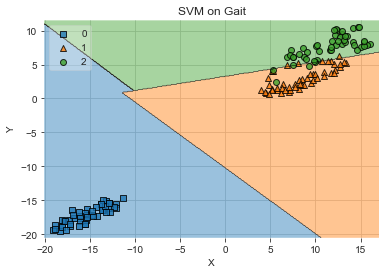

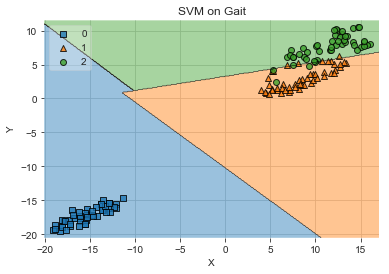

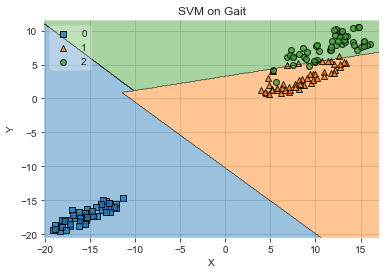

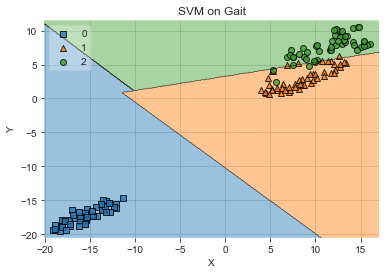

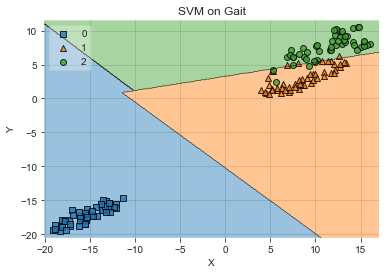

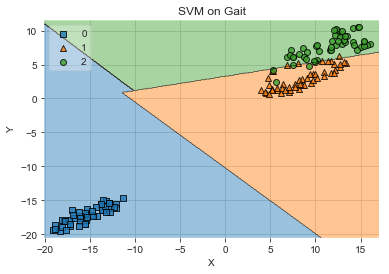

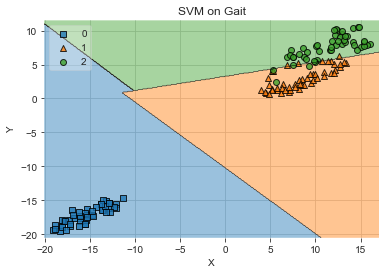

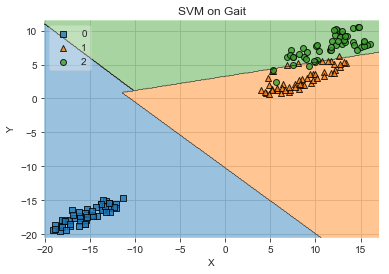

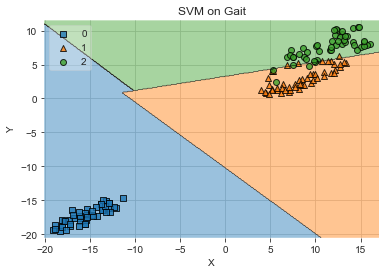

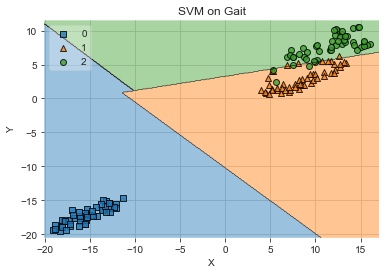

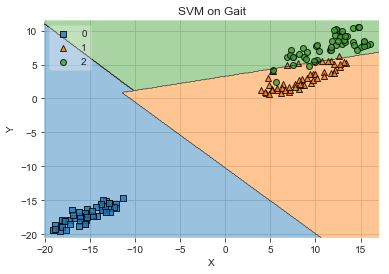

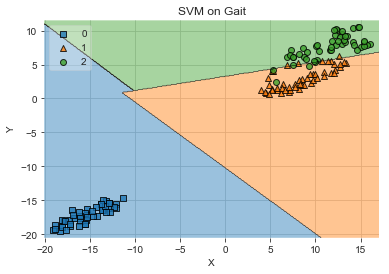

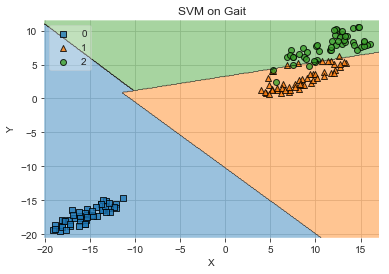

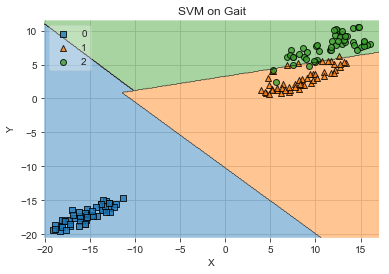

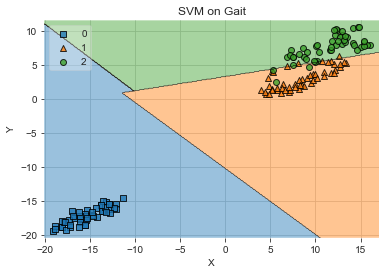

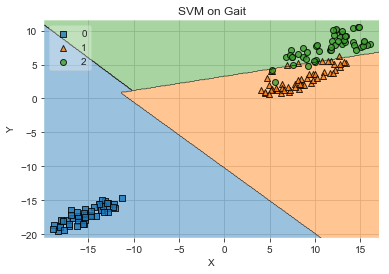

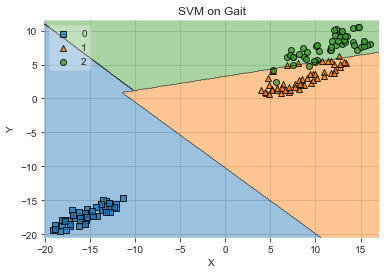

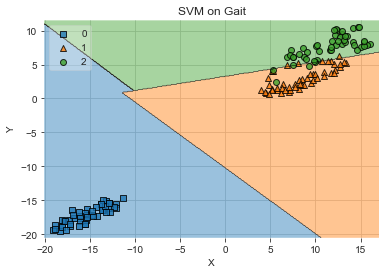

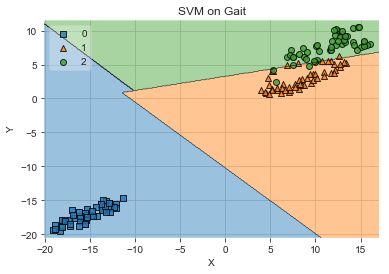

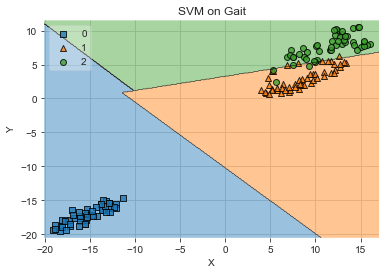

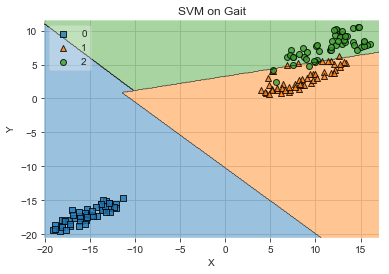

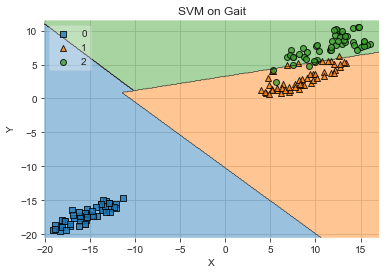

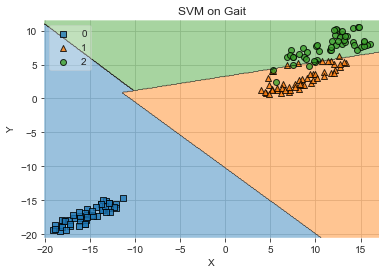

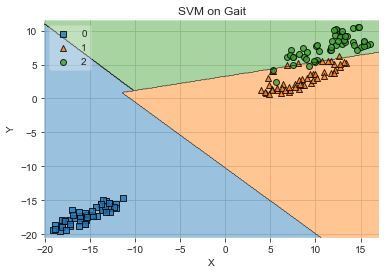

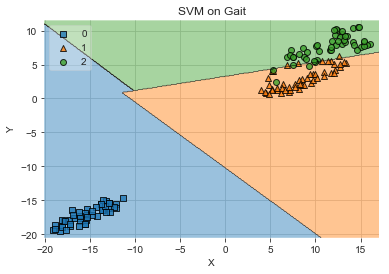

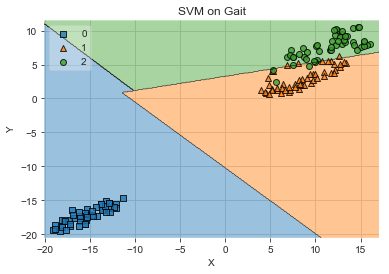

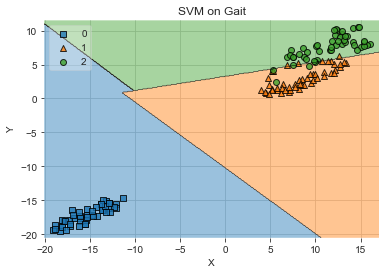

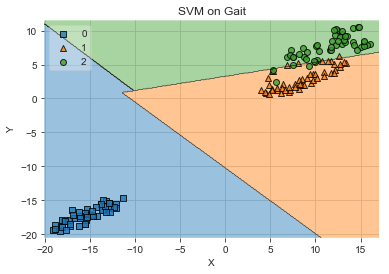

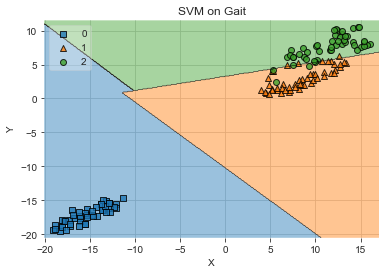

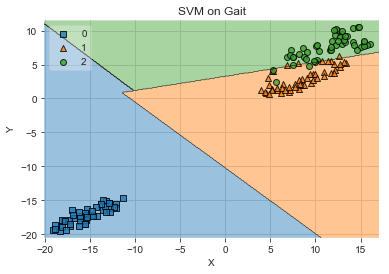

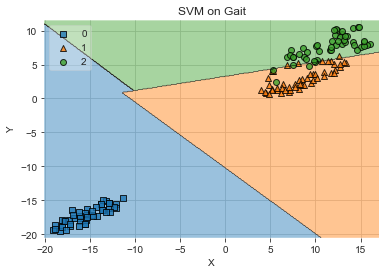

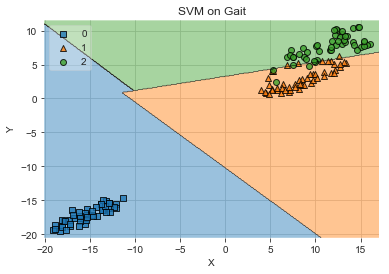

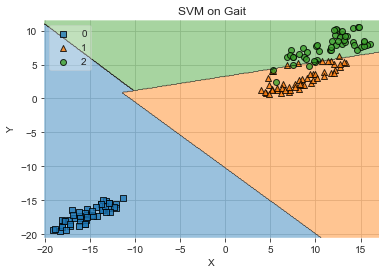

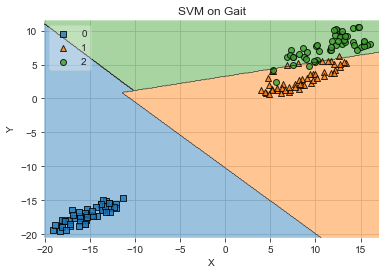

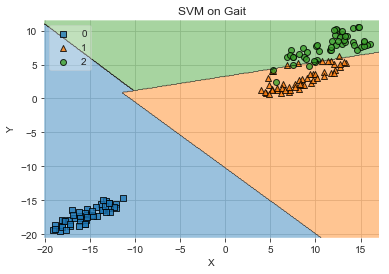

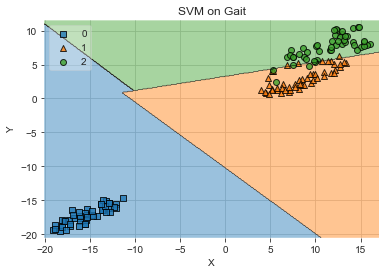

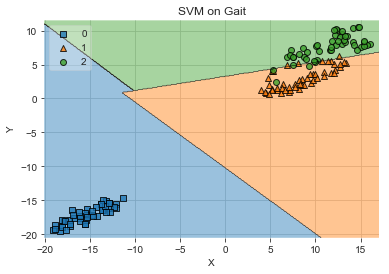

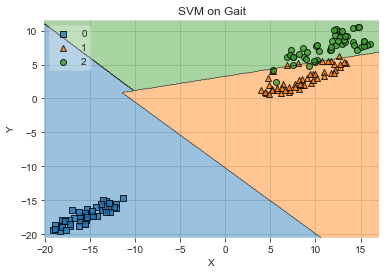

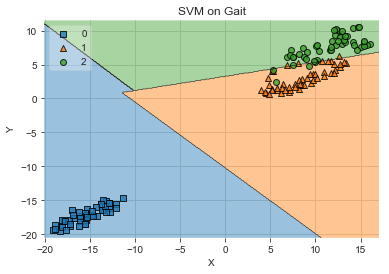

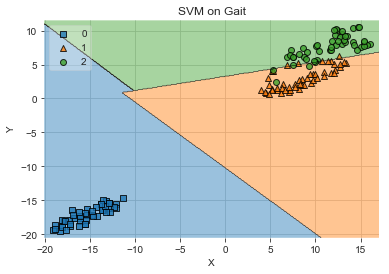

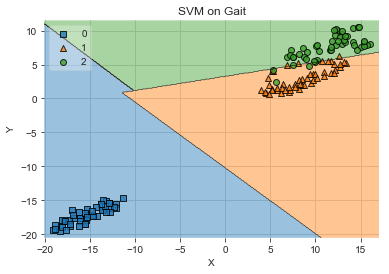

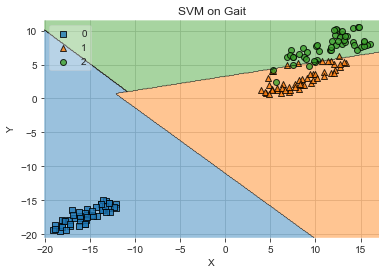

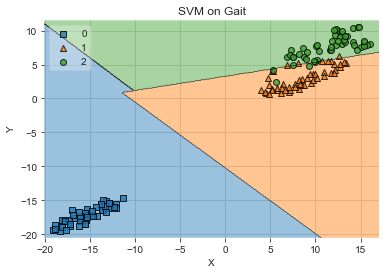

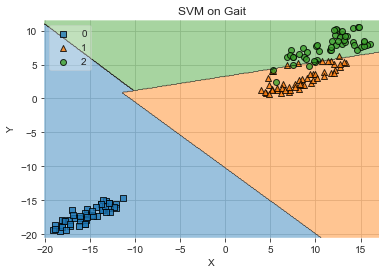

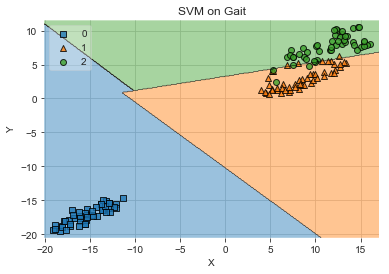

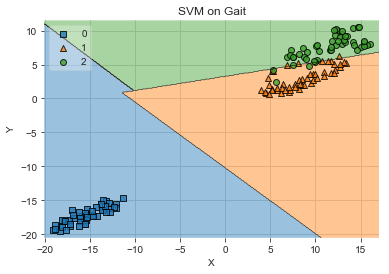

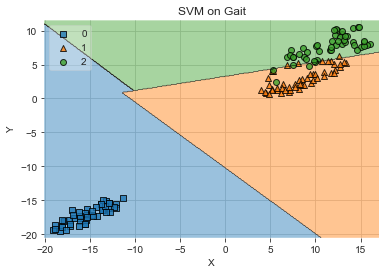

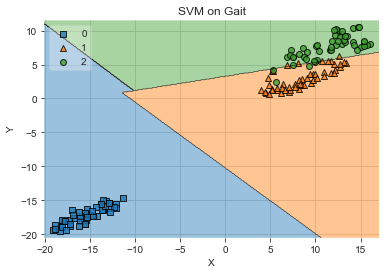

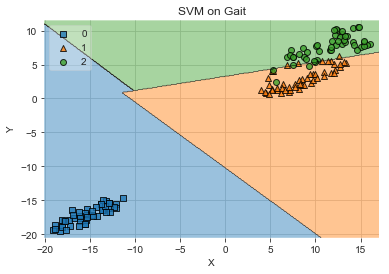

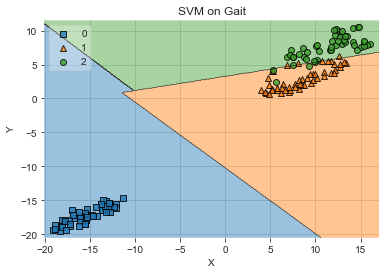

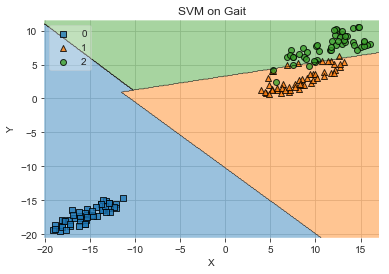

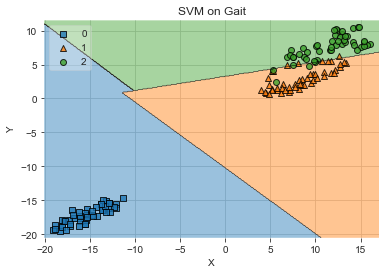

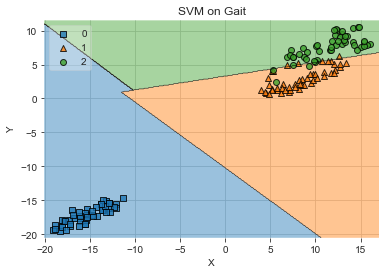

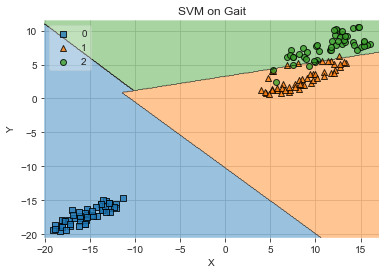

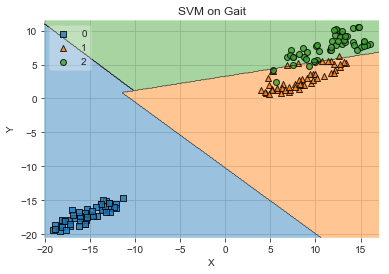

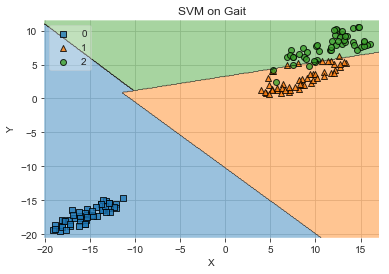

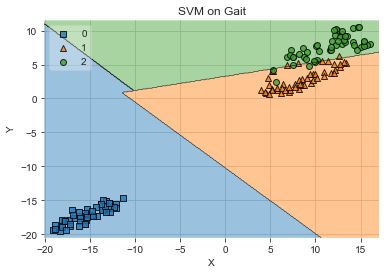

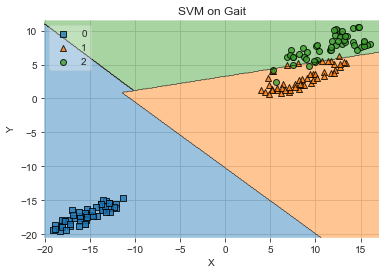

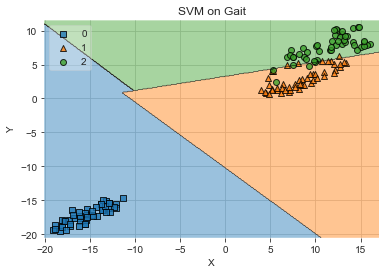

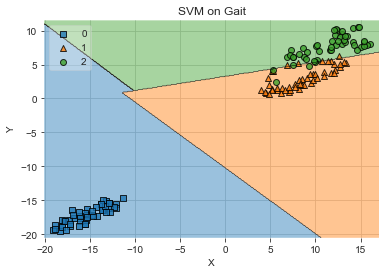

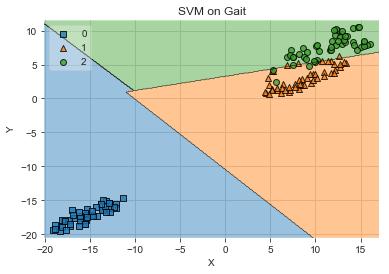

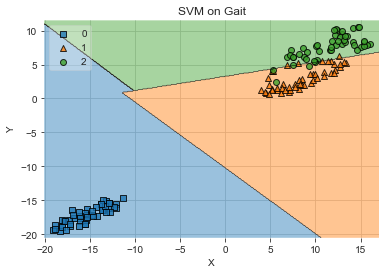

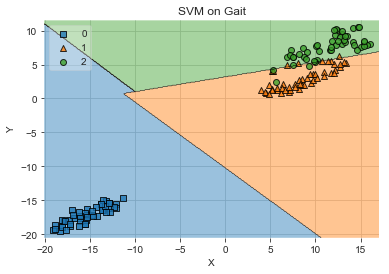

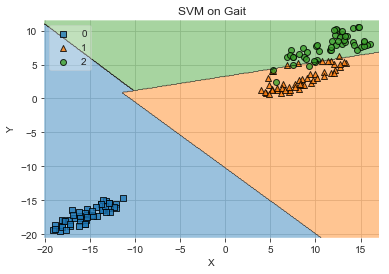

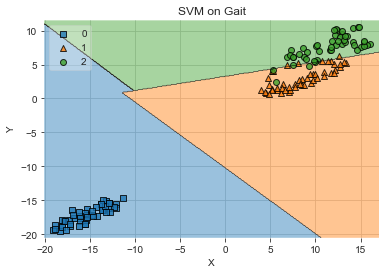

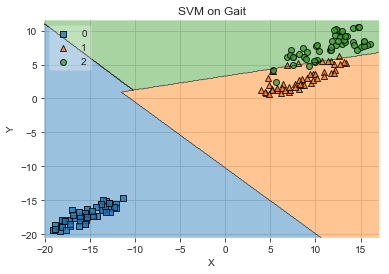

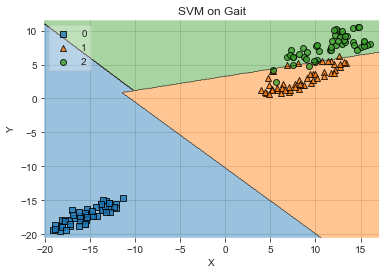

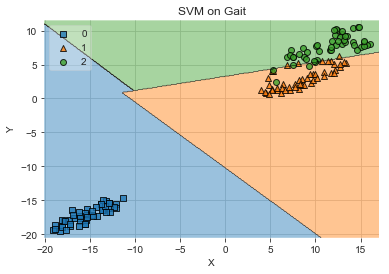

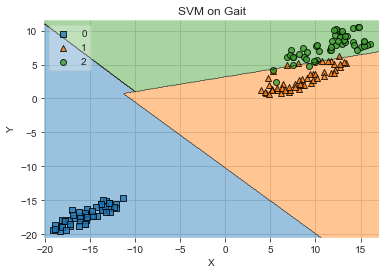

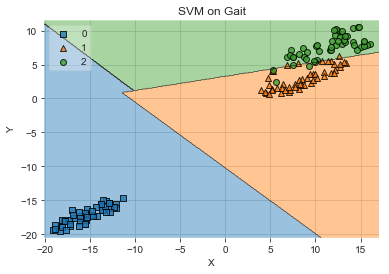

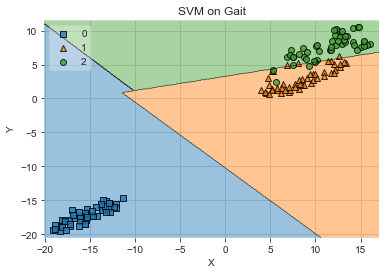

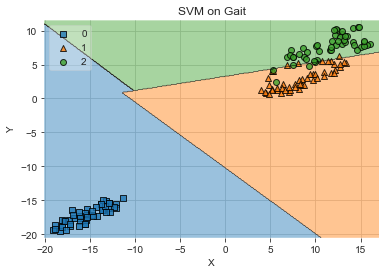

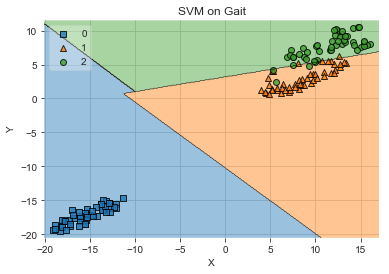

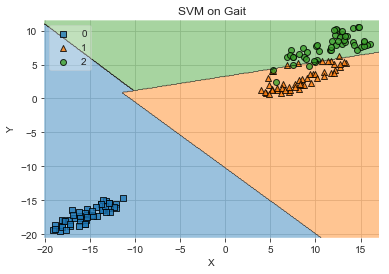

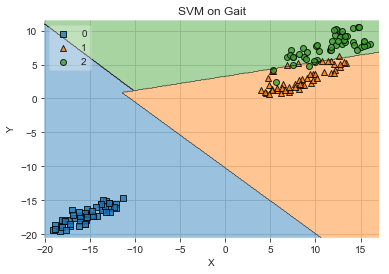

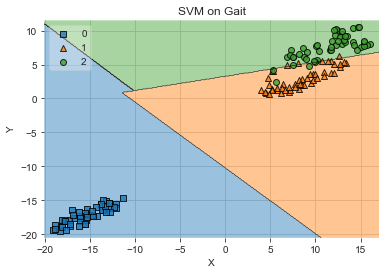

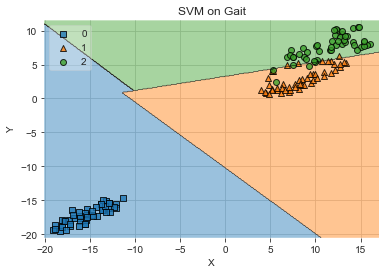

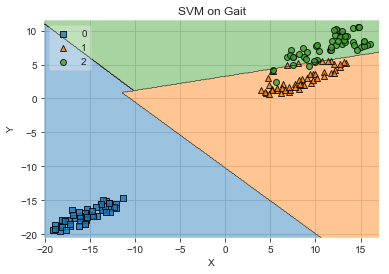

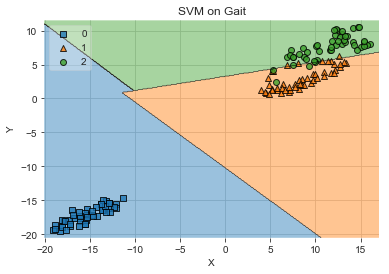

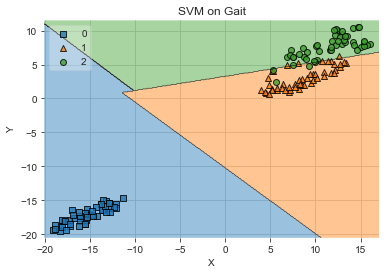

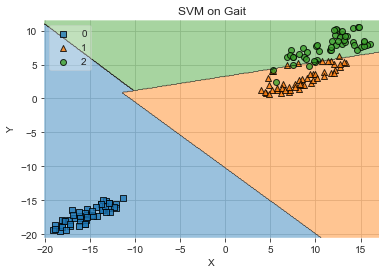

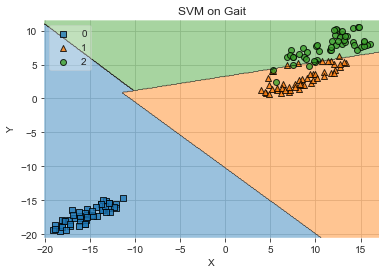

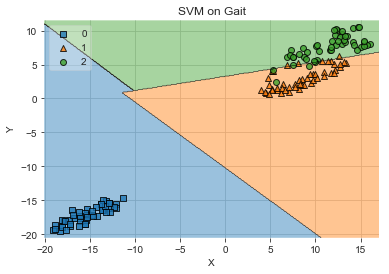

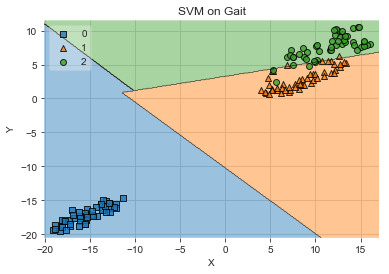

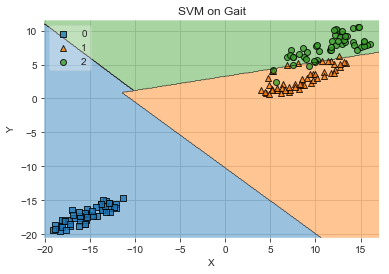

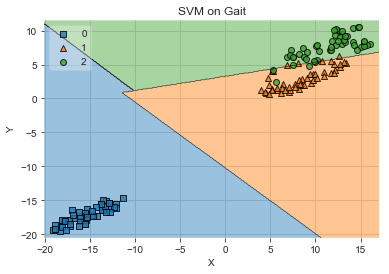

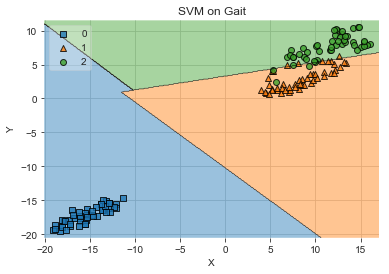

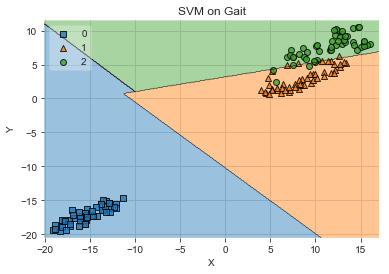

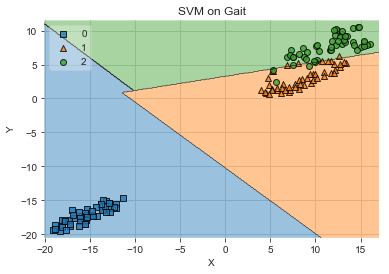

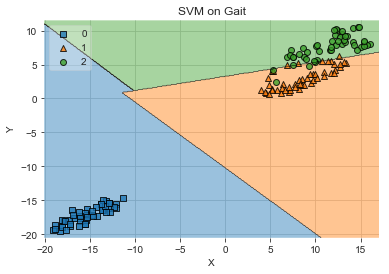

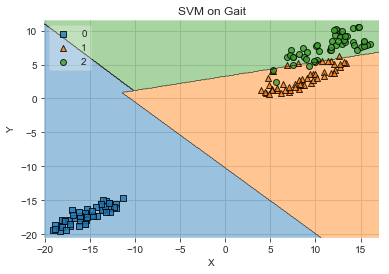

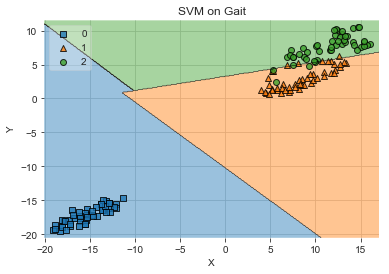

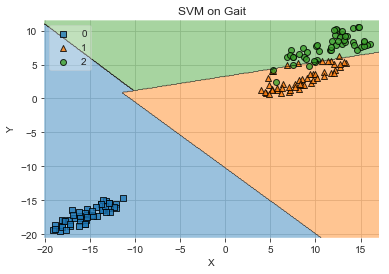

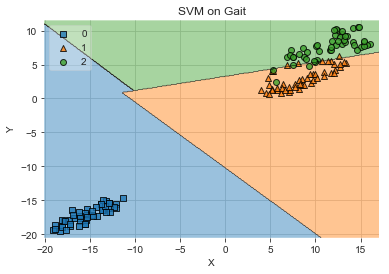

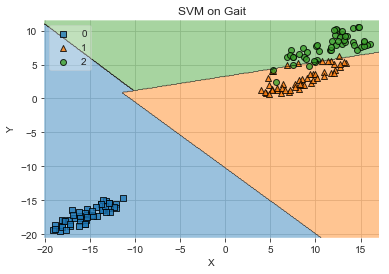

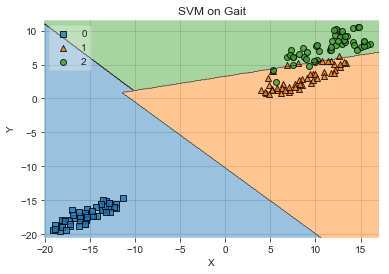

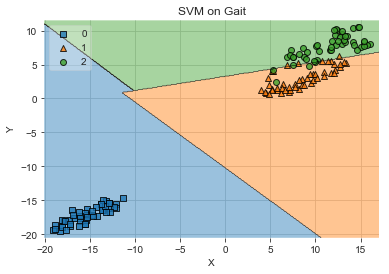

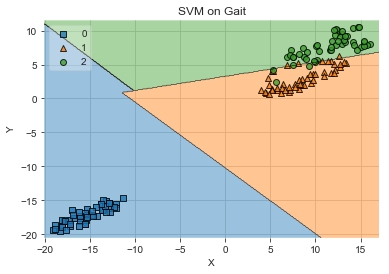

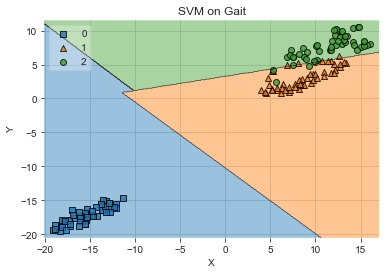

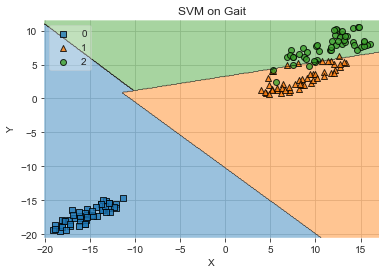

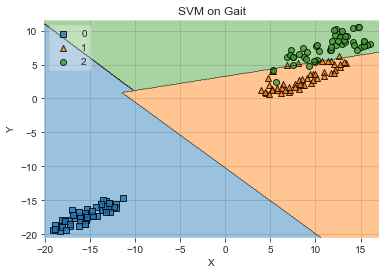

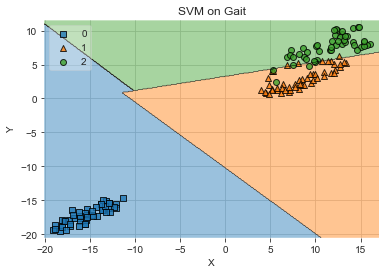

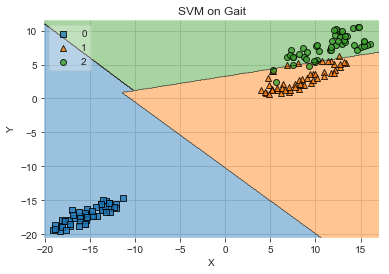

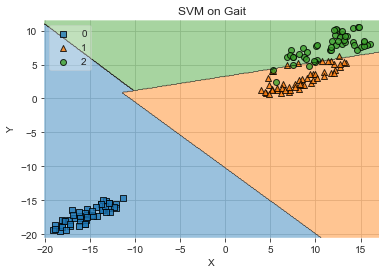

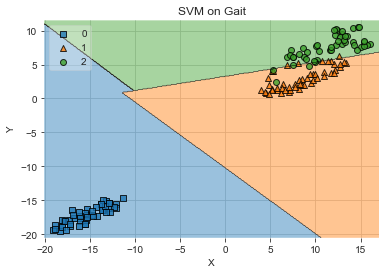

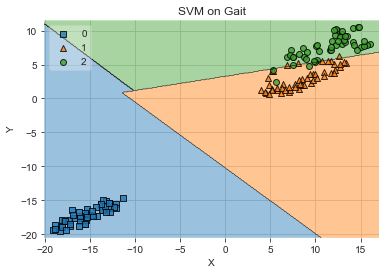

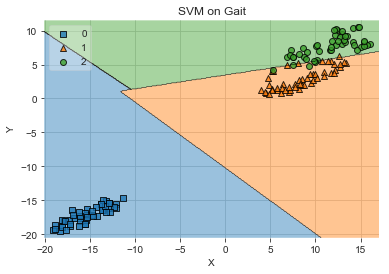

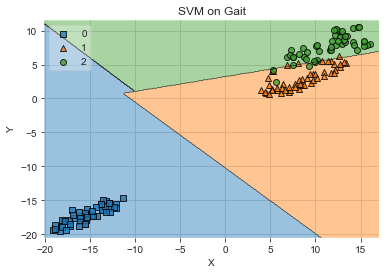

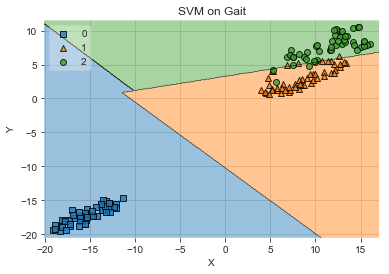

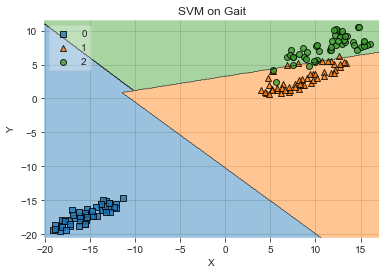

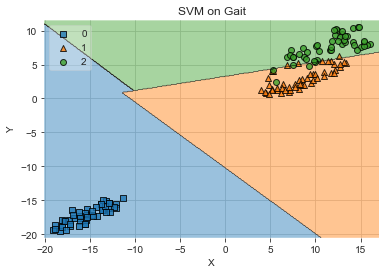

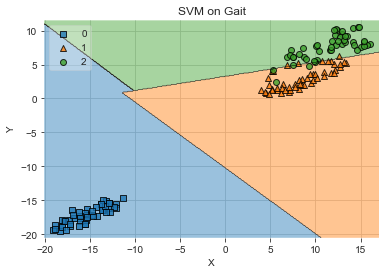

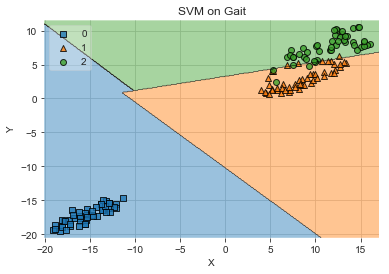

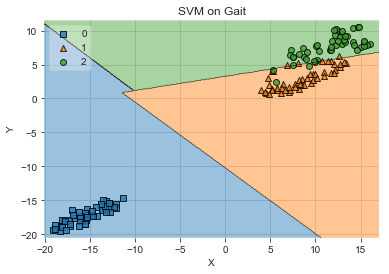

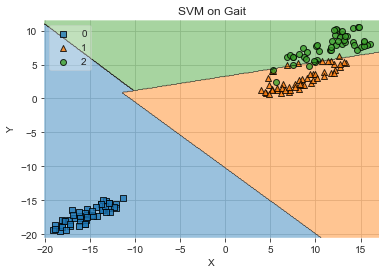

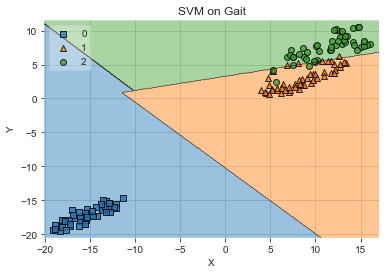

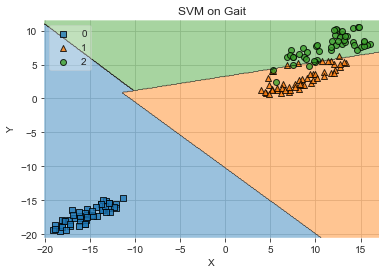

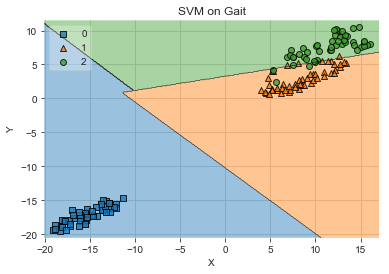

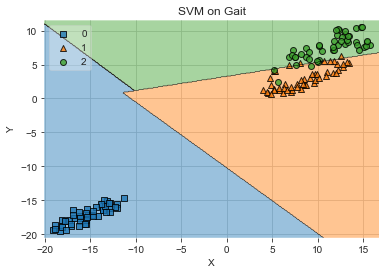

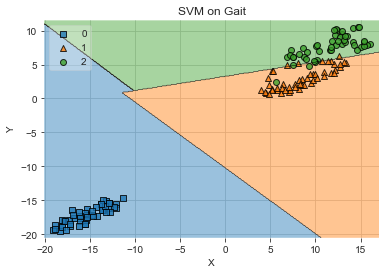

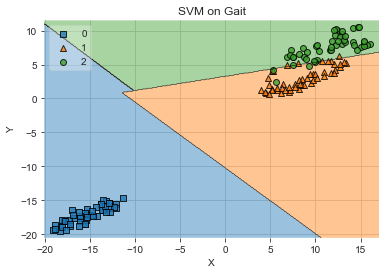

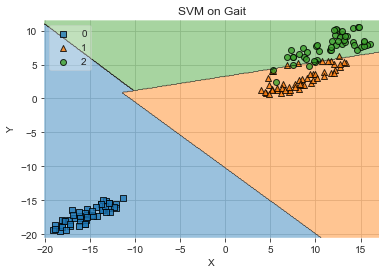

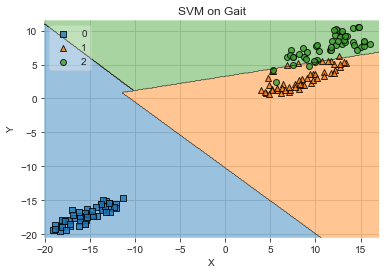

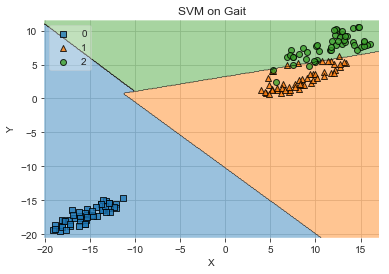

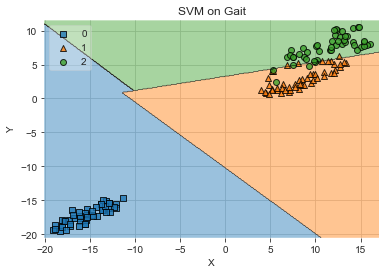

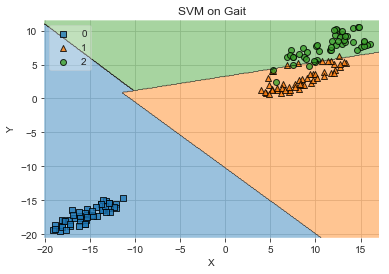

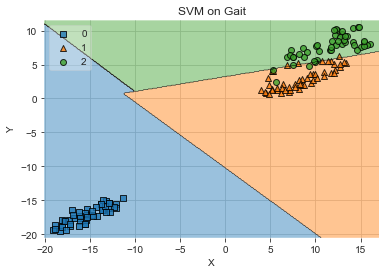

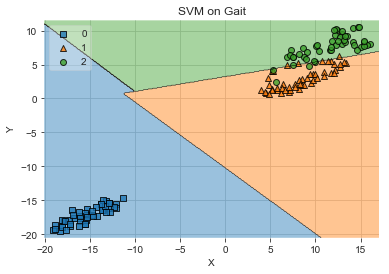

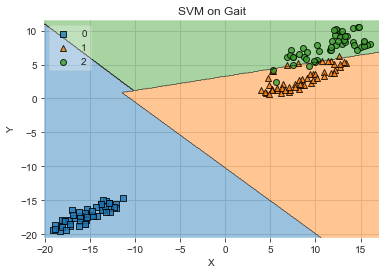

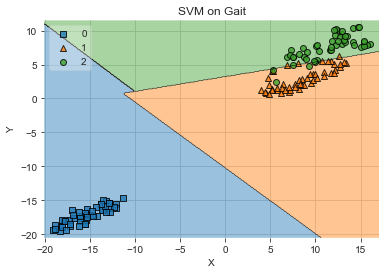

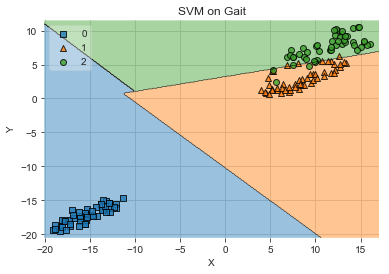

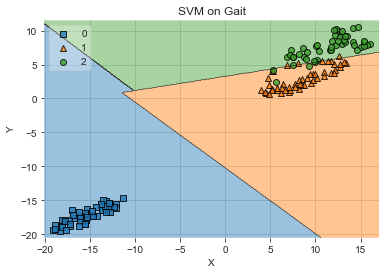

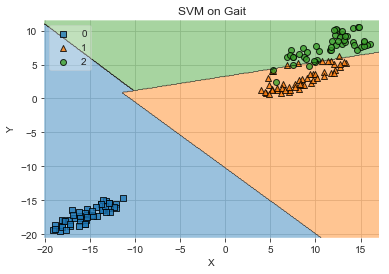

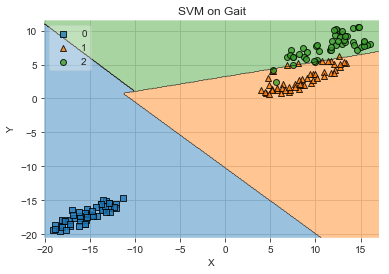

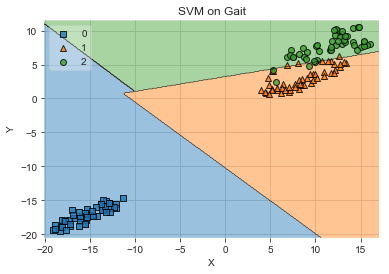

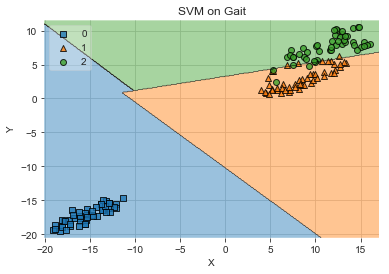

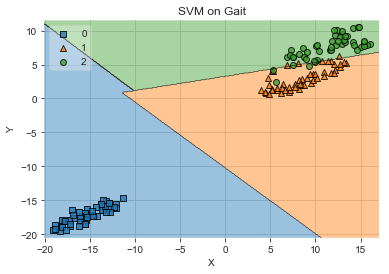

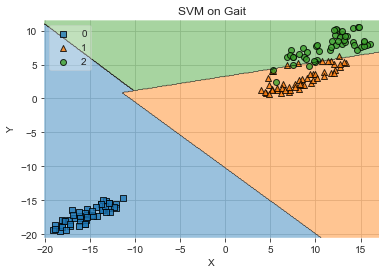

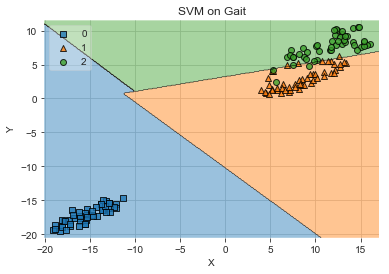

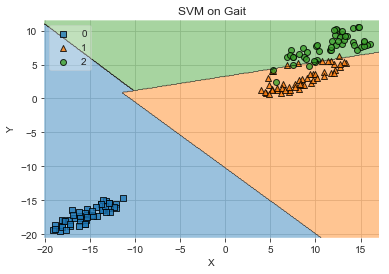

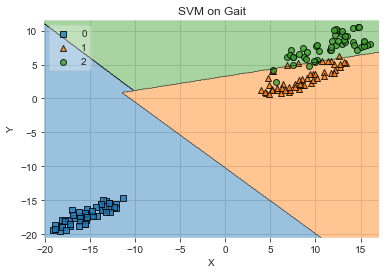

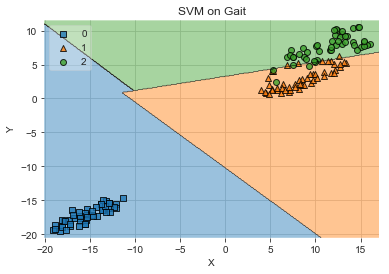

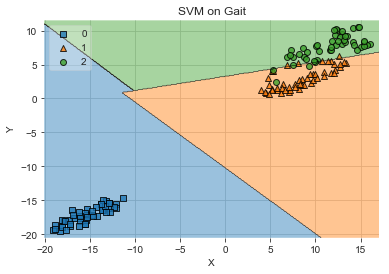

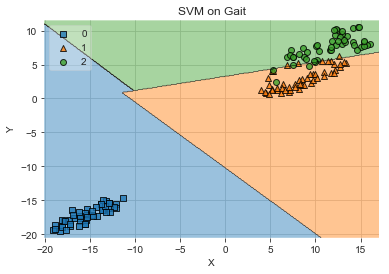

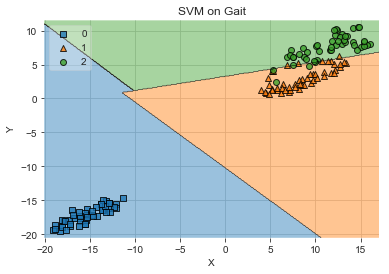

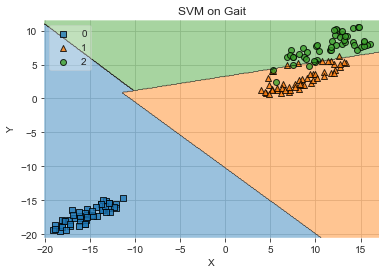

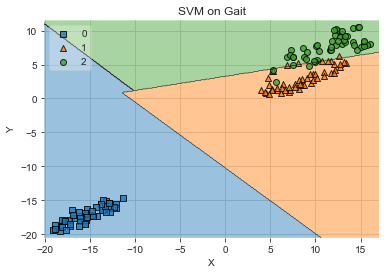

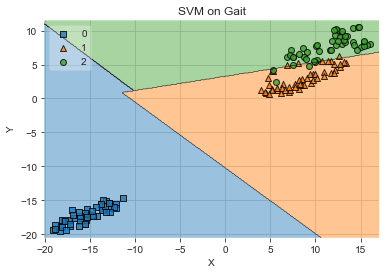

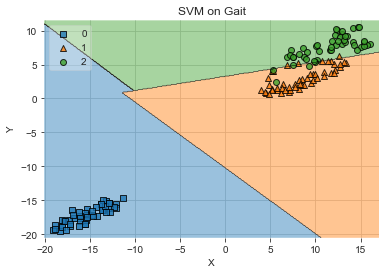

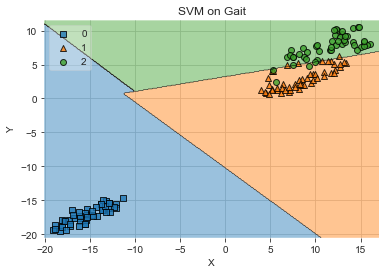

正解: 143/150
不正解: 7/150
正解率: 95.33333333333334
[array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 a

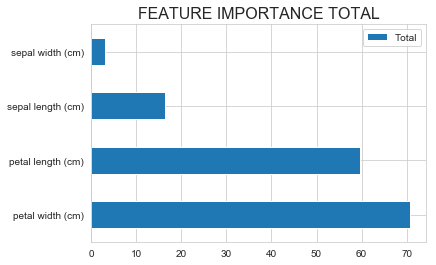

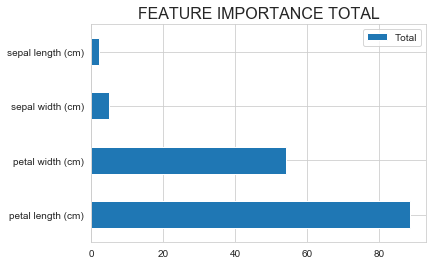

In [50]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

FEATUREINFO = False # Feature Importance, ツリー表示などのスイッチ。たくさん回すときは、うざいから False にする。
VERBOSE = False 
#CLASSIFIER = 'rfc'
#CLASSIFIER = 'rfc_RFE'
#CLASSIFIER = 'svm'
#CLASSIFIER = 'xgb'
#CLASSIFIER = 'dtc'
#CLASSIFIER = 'anf'
#CLASSIFIER = 'LS_svm'
#CLASSIFIER = 'vote'
#CLASSIFIER = 'log'
#CLASSIFIER = 'svm_tune'

CLASSIFIER_1 = 'svm'
CLASSIFIER_2 = 'rfc'
CLASSIFIER_3 = 'xgb'

#CLASSIFIER_1 = CLASSIFIER_2 = CLASSIFIER_3 = 'rfc'

STANDARD = False

from sklearn import preprocessing

print(CLASSIFIER_1)

rate_A_1, results_A_1, answers_A_1 = leaveoneout(CLASSIFIER_1, feature_col_names)
print(CLASSIFIER_2)
rate_A_2, results_A_2, answers_A_2 = leaveoneout(CLASSIFIER_2, feature_col_names)
print(CLASSIFIER_3)
rate_A_3, results_A_3, answers_A_3 = leaveoneout(CLASSIFIER_3, feature_col_names)
#feature_col_names = feature_col_names_VIF_1
#rate_GA, results_GA, answers_GA = leaveoneout(CLASSIFIER, feature_col_names)

results_A = np.array(results_A_1)
results_A = np.hstack((results_A, np.array(results_A_2)))
results_A = np.hstack((results_A, np.array(results_A_3)))
print(results_A)

import scipy.stats as stats
ensemble_A = stats.mode(results_A, axis=1)[0]
print(ensemble_A)

print('正解率(Avg, CV, GA):', rate_A_1, rate_A_2, rate_A_3)

# アンアンブル結果表示
N = len(df)
correct_A = reduce(lambda n, o: n + 1 if o else n, ensemble_A, 0)
msg = 'アンサンブル　正解: {0}/{1}'.format(correct_A, N)
print(msg)
failed_A = reduce(lambda n, o: n + 1 if not o else n, ensemble_A, 0)
msg = 'アンサンブル　不正解: {0}/{1}'.format(failed_A, N)
print(msg)
correct_rate_A = (float(correct_A) / N) * 100
msg = 'アンサンブル　正解率: {0}'.format(correct_rate_A)
print(msg)

# K-fold

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
STANDARD=True
n=3
#validation = kf
kf = KFold(n_splits=n,shuffle = True)
#skf = StratifiedKFold(n_splits=10)
cls= 'rfc'
x_data = df[feature_col_names].values
y_data= df[predicted_class_names].values
for train_index, eval_index in kf.split(x_data,y_data):
    
    X_train, X_test = x_data[train_index], x_data[eval_index]
    y_train, y_test = y_data[train_index], y_data[eval_index]
    
    if STANDARD==True:
        #標準化
        sc = preprocessing.StandardScaler()
    #    sc = preprocessing.MinMaxScaler()
        sc.fit(X_train)
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        print(X_train.shape)
        x_train = X_train
        x_test = X_test
    if cls=='svm' or cls=='anf' or cls=='svm_tune':
        sc = preprocessing.StandardScaler()
        #sc = preprocessing.MinMaxScaler()
        x_data = sc.fit_transform(x_data)
        print("標準化完了")
        x_data = TSNE(n_components=2, random_state=0).fit_transform(x_data)
        #or cls=='LS_svm'
        #pca = PCA(n_components=2) 
        #x_data = pca.fit_transform(x_data)
        print("次元削減完了")
        #print(x_data)

    if cls=='svm':
        answer = exec_svm(x_test, y_test, x_train, y_train)
    elif cls=='rfc':
        answer, fi = exec_rfc(x_test, y_test, x_train, y_train, feature_col_names)
    elif cls=='rfc_RFE':
        answer, fi = exec_rfc_RFE(x_test, y_test, x_train, y_train, feature_col_names)
    elif cls=='dtc':
        answer, fi = exec_dtc(x_test, y_test, x_train, y_train, feature_col_names)
    elif cls=='anf':
        answer = exec_anf(x_test, y_test, x_train, y_train)
    elif cls=='LS_svm': 
        answer = exec_LSSVM(x_test, y_test, x_train, y_train)
    elif cls=='vote': 
        answer = exec_vote(x_test, y_test, x_train, y_train)
    elif cls=='anf': 
        answer = exec_anf(x_test, y_test, x_train, y_train)
    elif cls=='log': 
        answer,fi = exec_log(x_test, y_test, x_train, y_train,feature_col_names)
    elif cls=='svm_tune':
        answer = exec_svm_tune(x_test, y_test, x_train, y_train)
    else:
        answer,fi = exec_xgb(x_test, y_test, x_train, y_train,feature_col_names)    
        
    # 正解率
    print("はじまり")
    test_acc = np.count_nonzero(y_test==answer)
    print("accuacyは",test_acc/len(y_test),"ちなみに正解数",test_acc,"合計",len(y_test))
    print(confusion_matrix(y_test,answer))
    print("kappa=",cohen_kappa_score(answer,y_test))
    print("終わり")

(100, 4)
はじまり
accuacyは 0.98 ちなみに正解数 49 合計 50
[[17  0  0]
 [ 0 18  0]
 [ 0  1 14]]
kappa= 0.9698613622664256
終わり
(100, 4)
はじまり
accuacyは 0.96 ちなみに正解数 48 合計 50
[[18  0  0]
 [ 0 17  0]
 [ 0  2 13]]
kappa= 0.939686369119421
終わり
(100, 4)
はじまり
accuacyは 0.92 ちなみに正解数 46 合計 50
[[15  0  0]
 [ 0 12  3]
 [ 0  1 19]]
kappa= 0.8780487804878049
終わり
